In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.stats import norm, rayleigh, expon

# Question 3

Show examples of two density functions (draw the function plots) that have the __same mean and variance__, but clearly __different distributions__. Plot both functions in the same graph with different colours.

__Answer:__

We take $X \sim N(2, 12)$, where $\mu = 2$, $\sigma^{2} = 12$, and $Y \sim U[-4, 8]$, which comes out be $\mathbb{E}(Y) = \dfrac{8-4}{2} = 2$, and $Var(Y) = \mathbb{E}(Y^{2}) - (\mathbb{E}(Y))^{2} = \dfrac{(b-a)^2}{12} = 12$.

In [2]:
# define normal distribution function.
def f_normal(x, mu, sigma2):
    """
    Input:
        x: a data point or an array of data points.
        mu: Mean parameter of the distribution function.
        sigma2: variance of the distribution function.
    Output:
        Corresponding probability value at x
    """
    return (1/np.sqrt(2*np.pi*sigma2))*np.exp(-(x-mu)**2/(2*sigma2))
# def Uniform distribution function
def f_uniform(x, a, b):
    """
    Input:
        x: a data point or an array of data points.
        a: Left limit of the distribution function.
        b: Right limit of the distribution function.
    Output:
        Corresponding probability value at x
    """
    if type(x) == np.ndarray: return np.array([1/(b-a) if a<=ele<=b else 0 for ele in np.squeeze(x)])
    else:
        if a<=x<=b: return 1/(b-a)
        else: return 0

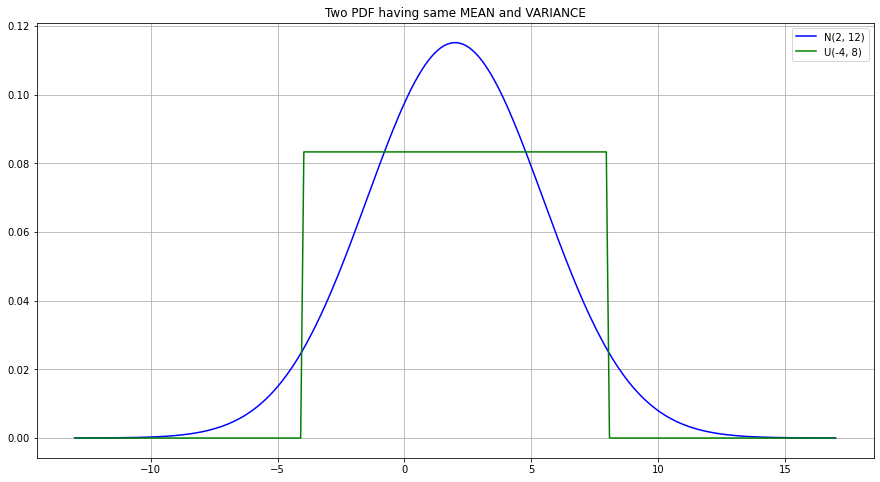

In [3]:
# plot the N(2, 4) and U(8, -4).
data = np.linspace(-13, 17, 240)
plt.figure(figsize = (15,8))
plt.plot(data,f_normal(data, 2, 12), color = "blue", label = "N(2, 12)")
plt.plot(data,f_uniform(data, -4, 8), color = "green", label = "U(-4, 8)")
plt.legend(loc = "best"); plt.title("Two PDF having same MEAN and VARIANCE"); plt.grid(); plt.show()

# Question 6

Using the inverse of CDFs, map a set of 10,000 random numbers from $U[0, 1]$ to follow the following pdfs:

1. Normal density with $\mu = 0$, $\sigma = 3.0$.
2. Rayleigh density with $\sigma = 1.0$.
3. Exponential density with $\lambda = 1.5$.

Once the numbers are generated, plot the normalized histograms (the values in the bins should add up to 1) of the new random numbers with appropriate bin sizes in each case; along with their pdfs. __What do you infer from the plots?__\
Note: see `rand()` function in `C` for `U[0, INT_MAX]`.

In [4]:
# Generate 10,000 random numbers from U[0, 1].
data_uni = np.random.uniform(0, 1, 10000)

## Normal density with $\mu = 0$, $\sigma = 3.0$.

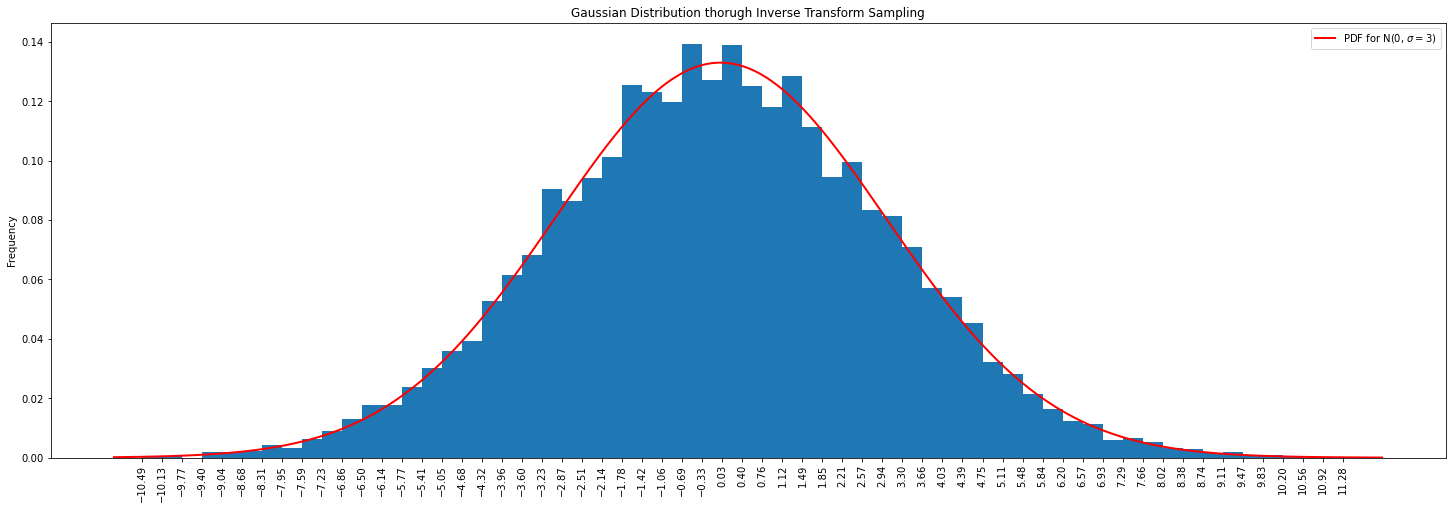

In [11]:
normal_cdf_inv = norm.ppf(data_uni, 0, 3)
#bins = [k for k in range(round(min(normal_cdf_inv)), round(max(normal_cdf_inv) + 1))]
plt.figure(figsize=(25, 8))
vals_at_x_norm, bins_norm, patches_norm = plt.hist(normal_cdf_inv, bins = 60, density = True)
pdf_x_points = np.linspace(-11,12,1000)
plt.plot(pdf_x_points, norm.pdf(pdf_x_points, 0, 3), color = "r", linewidth = 2, label = "PDF for N(0, $\sigma = 3$)")
plt.xticks(bins_norm, rotation = 90); plt.ylabel("Frequency")
plt.title("Gaussian Distribution thorugh Inverse Transform Sampling"); plt.legend(loc = "best"); plt.show()

## Rayleigh density with $\sigma = 1.0$.

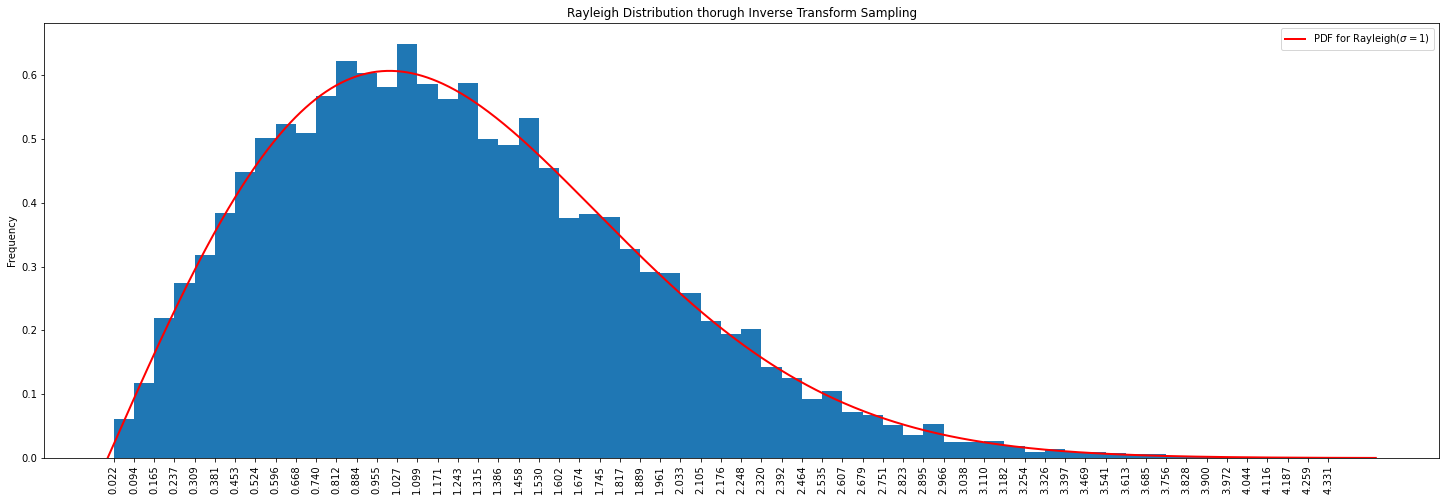

In [18]:
rayleigh_cdf_inv = rayleigh.ppf(data_uni, 0, 1)
#bins_ray = [k for k in range(round(min(rayleigh_cdf_inv)), round(max(rayleigh_cdf_inv) + 1))]
plt.figure(figsize=(25, 8))
_, bins_ray, patches_ray = plt.hist(rayleigh_cdf_inv, bins = 60, density = True)
pdf_x_points = np.linspace(0.0,4.5,1000)
plt.plot(pdf_x_points, rayleigh.pdf(pdf_x_points, 0, 1), color = "r", linewidth = 2, label = "PDF for Rayleigh($\sigma = 1$)")
plt.xticks(bins_ray, rotation = 90); plt.ylabel("Frequency")
plt.title("Rayleigh Distribution thorugh Inverse Transform Sampling"); plt.legend(loc = "best"); plt.show()

## Exponential density with $\lambda = 1.5$.

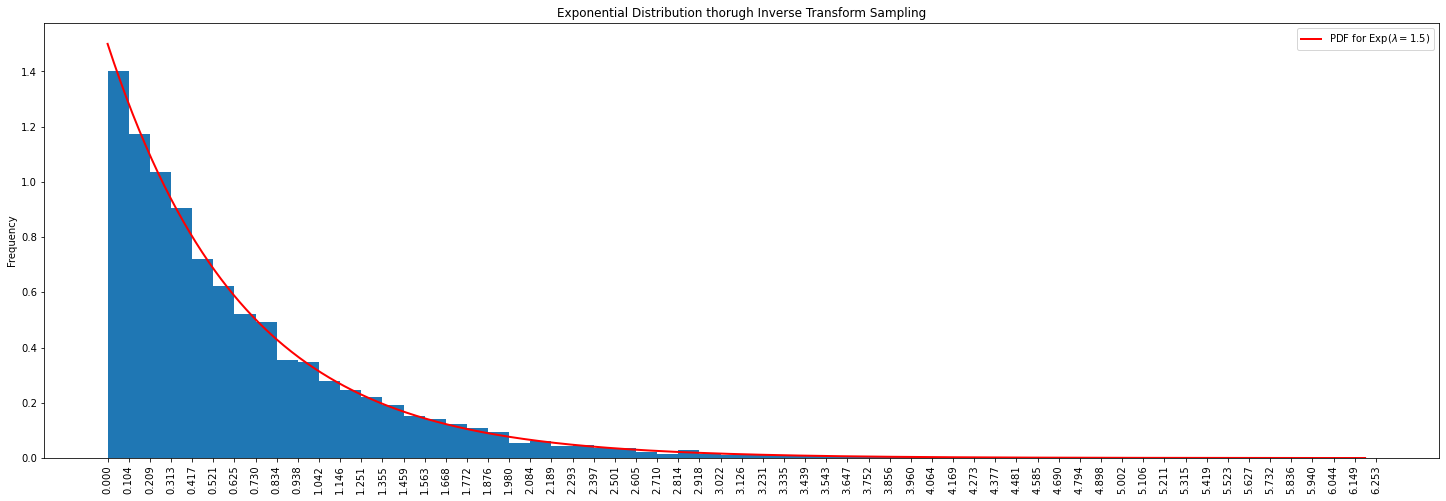

In [21]:
exp_cdf_inv = expon.ppf(data_uni, 0, (1/1.5))
plt.figure(figsize=(25, 8))
_, bins_exp, patches_exp = plt.hist(exp_cdf_inv, bins = 60, density = True)
pdf_x_points = np.linspace(0,6.2,1000)
plt.plot(pdf_x_points, expon.pdf(pdf_x_points, 0, 1/1.5), color = "r", linewidth = 2, label = "PDF for Exp($\lambda = 1.5$)")
plt.xticks(bins_exp, rotation = 90); plt.ylabel("Frequency")
plt.title("Exponential Distribution thorugh Inverse Transform Sampling"); plt.legend(loc = "best"); plt.show()

__Inference from the plots &mdash;__

1. Inverse of CDF (for a particular distribution) is a transformation of standard uniform random variable ($\sim U[0, 1]$) to such a random variable whose distribution is same as PDF for that particular random variable. 
2. And, suppose $X$ is a r.v. whose support (= domain) $ = [a, b]$, where $a, b \in \mathbb{R}$ and $a < b$, and $F_{X}(x)$ is the corresponding CDF for $X$. Then the interval/ region where slope of CDF is maximum (since non-decreasing, it can't be negative, hence positive) i.e. strictly increasing, there we can observe most of the observations/data-points from $U[0, 1]$ to get mapped via inverse-transform method.

_(Intuitively if we see, at places where slope rises the graph tends to cover a considerable part of the y-axis corresponding to a smaller region/interval on x-axis which in a sense maps a large chunk of y-axis to a small chunk in x-axis and this is why during inverse transform we get a hump or an accumulation of transformed data points.)_

# Question 7

Write a function to generate a random number as follows: Every time the function is called, it generates $500$ new random numbers from $U[0, 1]$ and outputs their sum.

Generate $50,000$ random numbers by repeatedly calling the above function, and plot their normalized histogram (with bin-size $= 1$). __What do you find about the shape of the resulting histogram?__

In [20]:
# random number generator
def sum_rand_uni01(seed):
    np.random.seed(seed)
    return np.sum(np.random.uniform(0, 1, 500))

# Generate 50,000 such numbers by calling the above function.
rand_lst = [sum_rand_uni01(i) for i in range(50000)]
bins = [j for j in range(np.floor(min(rand_lst)).astype(np.int32), np.ceil(max(rand_lst)).astype(np.int32))]

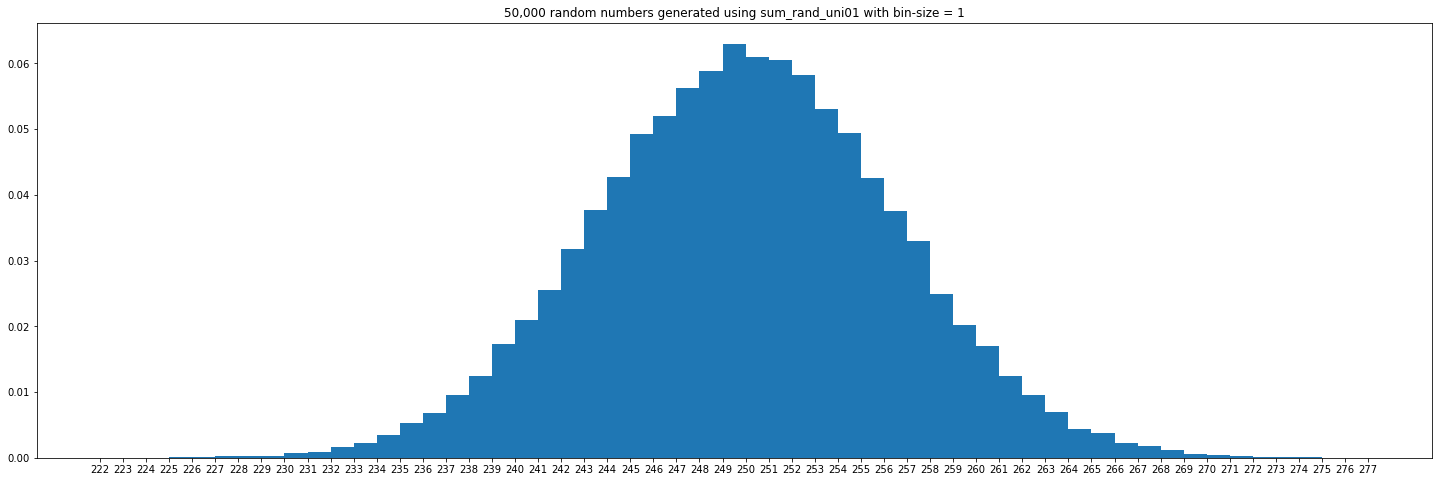

In [21]:
plt.figure(figsize=(25, 8))
# plot historam with these numbers
_, _, _ = plt.hist(rand_lst, bins = bins, density = True)
plt.xticks(bins); plt.title("50,000 random numbers generated using sum_rand_uni01 with bin-size = 1"); plt.show()

__Observations regarding above HISTOGRAM &mdash;__

The shape of the resulting Histogram is mostly __BELL-Shaped curve or Gaussian curve__ which can be credited to the __Central Limit Theorem__ where we just rid of $\bar{X}$ by $N \times \bar{X}$.

__Intuitive Statement &mdash;__
_suppose that a sample is obtained containing many observations, each observation being randomly generated in a way that does not depend on the values of the other observations, and that the arithmetic mean of the observed values is computed. If this procedure is performed many times, the __central limit theorem__ says that the probability distribution of the average will closely approximate a normal distribution._

__In our case:__\
Say,  $X_{1}, X_{2}, X_{3}, \ldots, X_{500}$ are generated for $call1 = $ Call no. 1 and we sum them up and return those values. Denote: $\bar{X}_{500} = \dfrac{1}{500}\sum_{i = 1}^{500}X_i$. Then $(500\bar{X}_{500}^{call\_1}, 500\bar{X}_{500}^{call\_2}, \ldots, 500\bar{X}_{500}^{call\_50,000})$ are generated for $50,000$ calls of function.

From __CLT__,\
$$\sqrt{n}\left(\bar{X}_{n} - \mu\right) \stackrel{d}{\longrightarrow}N(0, \sigma^{2})$$,
where $X_{1}, X_{2}, X_{3}, \ldots, X_{n}$ are $n$ random samples drawn from a population with overall mean $\mu$ and finite variance  $\sigma ^{2}$, and $\bar{X}_n$ is the sample mean $= \dfrac{1}{n}\sum_{i = 1}^{n}X_i$

In our case: $n = 1, 2, \ldots, 500$

Now consider $n = 500$ to be large enough that: 
$$
\begin{align*}
\left(\bar{X}_{n} - \mu\right) &\stackrel{approx}{\sim} N\left(\frac{0}{n}, \frac{\sigma^2}{n}\right)\\
\bar{X}_{n} &\sim N\left(\mu + \frac{0}{n}, \frac{\sigma^2}{n}\right)\\
500\bar{X}_{500} &\sim N\left(500\mu, \frac{500^2\sigma^2}{500}\right)\\
500\bar{X}_{500} &\sim N\left(250, \frac{500}{12}\right),\quad\text{where $\mu = 1/2$ as $X_i$ are generated from $U[0,1]$ and $\sigma^2 = (b-a)^2/12 = (1-0)^2/12 = 1/12$}.
\end{align*}
$$
That's why we get the peak of our histogram around $250$ with variance $\dfrac{500}{12}$.